### *Import Packages and Modules*
***

In [249]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import glob
import re
import matplotlib.pyplot as plt
import matplotlib
import warnings
from matplotlib import *
from netCDF4 import Dataset
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from pylr2 import regress2
import itertools
import statsmodels.api as sm
import time
from operator import itemgetter
import csv
import statistics
from major_axis_regression import regress2
from parula import parula
# parula is a .py file that should be found in script that adds parula, the same colour scale as Cael uses to the data. 

In [250]:
parula_map = parula()

In [251]:
def JG_BBCael(data,bbeta,data_no,bbeta_pair_no):
    import statsmodels.api as sm
    import numpy as np 

    # find random coordinate points for SO 
    #change size to be 721 to match cael's filter TJ 
    index_number = np.random.randint(0, high=data_no, size=data_no)        
    
    #print('average in mask:', np.average(new_mask))
    # this average should be 1 == only areas with values are selected
    #print('(should be one or else something went wrong)')

    # use randomly selected coordinate points to select 10000 random values of Foc, Fic and Fsi 
    random_depth = data[index_number,0]
    random_Foc = data[index_number, 3]
    random_Fic = data[index_number, 4]
    random_Fsi = data[index_number, 5]
    
    #y = np.power((random_depth[:, np.newaxis]/1000), bbeta[:, 0])
    #y = np.log((random_Foc[:, np.newaxis] * y))
    #x = np.log((random_Fic[:, np.newaxis]) + (bbeta[:, 1] * random_Fsi[:, np.newaxis]))

    y = np.log(random_Foc[:, np.newaxis]) + (bbeta[:, 0] * np.subtract(np.log(random_depth[:, np.newaxis]),np.log(1000)))
    x = np.log((random_Fic[:, np.newaxis]) + (bbeta[:, 1] * random_Fsi[:, np.newaxis]))

    
    r_squared = np.ones((bbeta_pair_no))*np.nan
    slope = np.ones((bbeta_pair_no))*np.nan
    intercept = np.ones((bbeta_pair_no))*np.nan

    for i in np.arange(0,bbeta_pair_no,1):
        r_squared[i], slope[i], intercept[i] = regress2(x[:,i], y[:,i], _method_type_2="major axis")

    r_maximum = np.nanmax(r_squared)

    where_max = np.where(r_squared==r_maximum)

    b_maxr = np.nanmean(bbeta[where_max, 0])
    beta_maxr = np.nanmean(bbeta[where_max, 1])
    slope_max = np.nanmean(slope[where_max])
    intercept_max = np.nanmean(intercept[where_max])

    return r_maximum, b_maxr, beta_maxr, slope_max, intercept_max


***
### *Import Data*

TJ- I'm going to use JG's .npy grids. I am not 100% sure how these data were masked/derived but am going with the following:

    # use randomly selected coordinate points to select 10000 random values of Foc, Fic and Fsi 
    random_Foc = data[4, index_number]
    random_Fic = data[5, index_number]
    random_Fsi = data[6, index_number]
    random_depth = data[7, index_number]
    
I'm now putting them into the format required by TJ_replicateCAEL.ipynb (Joe's code with small adjustments
    

the number of observations in JG dataset for region TP is 1289
1 :    0.1990039348602295
100 :     19.786696910858154
500 :     79.68983387947083
999 :     99.42544913291931
TP
r2:         0.655937998561863
b:          0.5800000000000002
beta:          0.42999999999999994
median intercept aka A:  1.6037163905844047
gamma aka slope      0.44611125684719155
kapppa aka median(exp(intercept)) 4.971474074666494
(1289,)
(1289,)


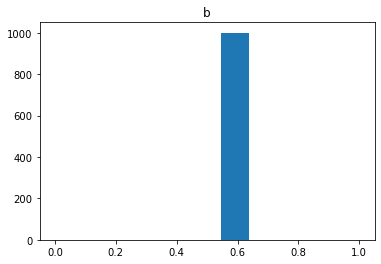

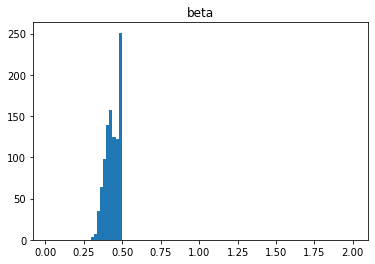

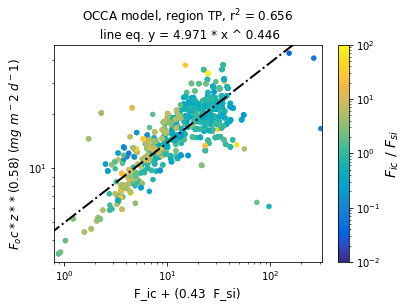

the number of observations in JG dataset for region NA is 1006
1 :    0.18857693672180176
100 :     18.515090942382812
500 :     74.91315412521362
999 :     93.28829646110535
NA
r2:         0.7820688631400929
b:          0.5600000000000002
beta:          0.06999999999999999
median intercept aka A:  2.25330302931572
gamma aka slope      0.7372854597028604
kapppa aka median(exp(intercept)) 9.51912604318131
(1006,)
(1006,)


<Figure size 432x288 with 0 Axes>

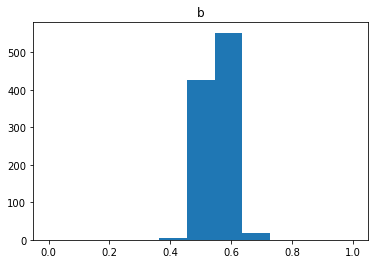

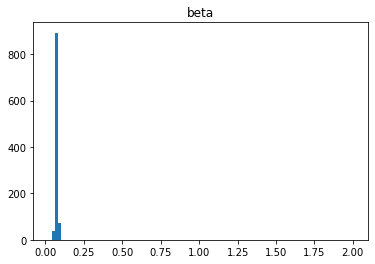

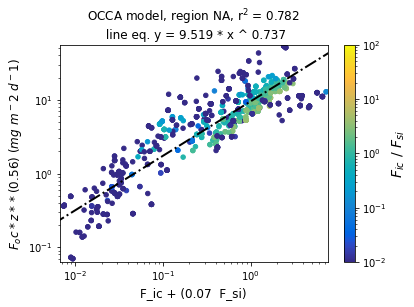

the number of observations in JG dataset for region NP is 1707
1 :    0.216078519821167
100 :     21.120277881622314
500 :     85.34692025184631
999 :     106.28192591667175
NP
r2:         0.742778309353052
b:          0.5400000000000001
beta:          0.36999999999999994
median intercept aka A:  1.228475365462372
gamma aka slope      0.4521718335114711
kapppa aka median(exp(intercept)) 3.4160173870182966
(1707,)
(1707,)


<Figure size 432x288 with 0 Axes>

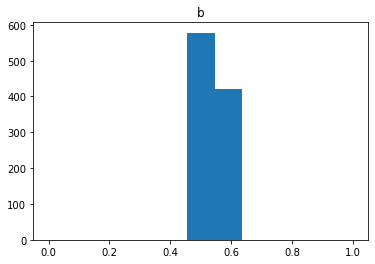

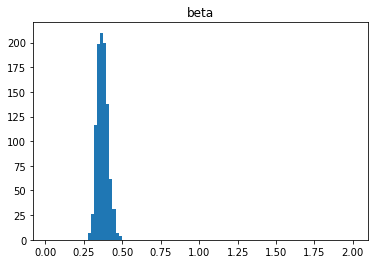

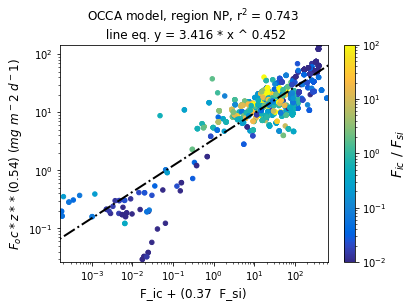

the number of observations in JG dataset for region SO is 767
1 :    0.18279790878295898
100 :     17.721805095672607
500 :     71.79922890663147
999 :     90.97849774360657
SO
r2:         0.6000796624389428
b:          0.4
beta:          0.48999999999999994
median intercept aka A:  2.334193804272153
gamma aka slope      0.5606341223889413
kapppa aka median(exp(intercept)) 10.321135724157404
(767,)
(767,)


<Figure size 432x288 with 0 Axes>

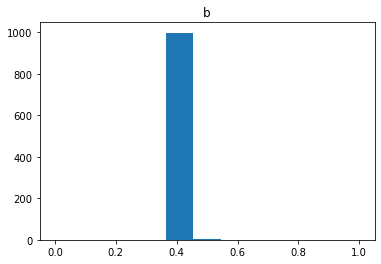

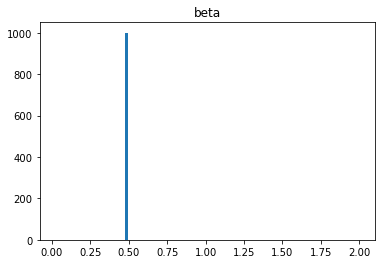

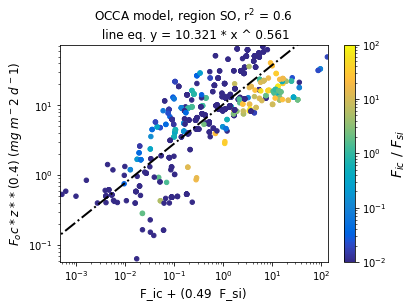

the number of observations in JG dataset for region TA is 1559
1 :    0.21122121810913086
100 :     21.14511466026306
500 :     86.36847019195557
999 :     106.98624777793884
TA
r2:         0.8203220088024717
b:          0.44000000000000006
beta:          0.48999999999999994
median intercept aka A:  1.3580107896406037
gamma aka slope      0.5770778043833638
kapppa aka median(exp(intercept)) 3.888450657145025
(1559,)
(1559,)


<Figure size 432x288 with 0 Axes>

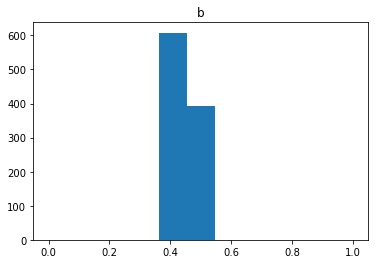

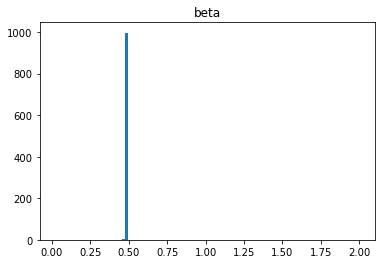

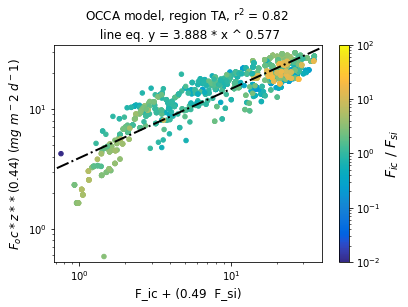

the number of observations in JG dataset for region TP is 1289
1 :    0.20180583000183105
100 :     20.01698899269104
500 :     80.98420906066895
999 :     101.04344201087952
TP
r2:         0.657779007207535
b:          0.5800000000000002
beta:          0.44999999999999996
median intercept aka A:  1.6020196620324278
gamma aka slope      0.44654877219638633
kapppa aka median(exp(intercept)) 4.963045986916697
(1289,)
(1289,)


<Figure size 432x288 with 0 Axes>

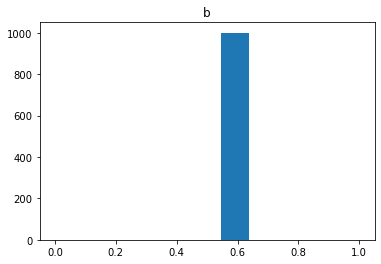

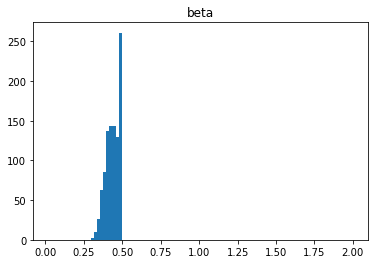

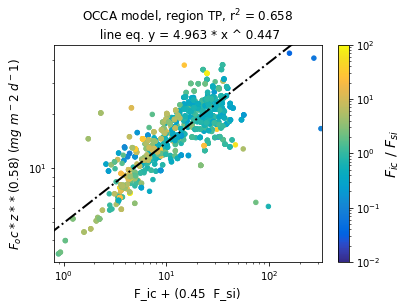

<Figure size 432x288 with 0 Axes>

In [252]:
# region = 'TP' #NA, NP, SO, TA, TP
# OCCA = np.load(f'../data/OCCA_masked2obs/{region}_BB_OCCA.npy') 

regions = ['TP', 'NA', 'NP', 'SO', 'TA', 'TP']
for i in range(0,len(regions)):
    region = regions[i]
    OCCA = np.load(f'../data/OCCA_masked2obs/{region}_BB_OCCA.npy') 
    
    ###### get data and filter nans
    data = OCCA
    #get column titles from JGFig1-ocean_opal_ballasting/scripts/Fig1_masked_model/Masked%20Model%20SO%20OCCA.ipynb
    Foc = data[4, :]
    Fic = data[5, :]
    Fsi = data[6, :]
    depth = data[7, :]

    #filter - no negatives, no nans. 

    filt = (Foc>0)&(Fic>0)&(Fsi>0)&(depth>0)&(~np.isnan(Foc))&(~np.isnan(Fic))&(~np.isnan(Fsi))&(~np.isnan(depth))
    bb_depths_so = depth[filt]
    bb_Foc_so = Foc[filt]
    bb_Fic_so = Fic[filt]
    bb_Fsi_so = Fsi[filt]

    data_no = (np.shape(bb_Fsi_so)[0]) #number of observations
    print(f'the number of observations in JG dataset for region {region} is {data_no}')
    #print(bb_Fsi_so)
    #put the filtered stuff 
    forjoesouth_filt = np.zeros([data_no,6]) #forjoesouth_filt is a legacy name 
    forjoesouth_filt[:,0] = bb_depths_so
    forjoesouth_filt[:,3] = bb_Foc_so
    forjoesouth_filt[:,4] = bb_Fic_so
    forjoesouth_filt[:,5] = bb_Fsi_so
    
    # define b and beta
    b = numpy.arange(0.4, 1, 0.02)
    beta = numpy.arange(0.01,  0.5, 0.02)

    # define number of searches within b and beta (for histograms later)
    b_bins = (1-0.4)/0.05
    beta_bins = 0.5/0.005

    # this calculates the number of b/beta unique combinations
    bbeta = np.array(list(itertools.product(b, beta)))
    bbeta_pair_no = int((bbeta[:,1].shape)[0])
    #print(bbeta_pair_no)
    
    
    n = data_no # change to smaller dataset # this is the number of samples taken each time (ideally the same as the size of the dataset)
    resamples = 1000 # this is the number of bootstrap resamples
    #here we initiate the variables
    r_maximum = np.ones((resamples))*np.nan
    b_maxr = np.ones((resamples))*np.nan
    beta_maxr = np.ones((resamples))*np.nan
    slope_max = np.ones((resamples))*np.nan
    intercept_max = np.ones((resamples))*np.nan
    random_Fic = np.ones((resamples,n))*np.nan
    random_Foc = np.ones((resamples,n))*np.nan
    random_Fsi = np.ones((resamples,n))*np.nan
    random_depth = np.ones((resamples, n))*np.nan
    
    # here we run through the function which finds the best fit of b and beta of the range given
# we do this as many times as given in the resamples (usually at least as many data points)

#tj run it on the filtered data

    for i in np.arange(0,resamples,1):
        w = time.time()
        r_maximum[i], b_maxr[i], beta_maxr[i], slope_max[i], intercept_max[i] = \
        JG_BBCael(forjoesouth_filt,bbeta,data_no,bbeta_pair_no)
        if i == 1:
            w1 = time.time()
            print(i, ':   ', w1-w)
        if i == 100:
            w2=time.time()
            print(i, ':    ', w2-w1)
        if i == 500:
            w3=time.time()
            print(i, ':    ', w3-w2)
        if i == 999:
            w4=time.time()
            print(i, ':    ', w4-w3)
            
    
    plt.figure()
    plt.hist(b_maxr, range=(0.00, 1), bins=int(b_bins))
    plt.title('b')
    plt.figure()
    plt.hist(beta_maxr, range=(0.02, 2), bins=int(beta_bins))
    plt.title('beta')
    
    # find median values of the best fit regressions

    r2_median = np.nanmedian(r_maximum**2)
    b_median = np.nanmedian(b_maxr)
    beta_median = np.nanmedian(beta_maxr)
    intercept_median = np.nanmedian(intercept_max)
    slope_median = np.nanmedian(slope_max)

    kappa = np.exp(intercept_max)
    kappa_median = np.nanmedian(np.exp(intercept_max))

    a_ic_1 = kappa**(1/slope_median)
    a_si_1 = beta_median*kappa**(1/slope_median)

    a_ic = kappa_median**(1/slope_median)
    a_si = beta_median*kappa_median**(1/slope_median)

    # print(a_ic)
    # print(a_si)
    print(region)
    print('r2:        ', r2_median)
    print('b:         ', b_median)
    print('beta:         ', beta_median)
    # print('a_ic:      ', a_ic)
    # print('a_si:      ', a_si)
    print('median intercept aka A: ', intercept_median)
    print('gamma aka slope     ', slope_median)
    print(f'kapppa aka median(exp(intercept)) {kappa_median}') 
    
    
    # forjoesouth_filt[:,3] = bb_Foc_so
    # forjoesouth_filt[:,4] = bb_Fic_so
    # forjoesouth_filt[:,5] = bb_Fsi_so
    log_y = np.log(forjoesouth_filt[:,3]) + (b_median * np.subtract(np.log(forjoesouth_filt[:,0]),np.log(1000)))
    #log_x = np.log(kappa_median**slope_median*((forjoesouth_filt[:,4]) + (beta_median * forjoesouth_filt[:,5])))
    log_x = np.log(forjoesouth_filt[:,4] + beta_median * forjoesouth_filt[:,5]) #let's plot the thing we actually took a regression of shall we

    y = np.exp(log_y)
    x = np.exp(log_x)

    scale = forjoesouth_filt[:,4] / forjoesouth_filt[:,5]
    print(np.shape(log_y))
    print(np.shape(scale))
    
    x_line = [0.00001, np.max(x)+10000]
    y_line = kappa_median*x_line**slope_median
    
    plt.figure()
    ax = plt.gca()
    plt.plot(x_line, y_line, color='black', ls='-.', lw=2)
    g = ax.scatter(x, y, c=scale, cmap=parula_map, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=100), s=20)
    ax.set_yscale('log')
    ax.set_xscale('log')
    #plt.ylim(1e-2, 316.227766017)
    #plt.xlim(0.00316227766, 600)
    #axis([.005 500 .005 500])
    plt.ylim(np.min(y)-0.1*np.min(y), np.max(y)+0.3*np.mean(y))
    plt.xlim(np.min(x)-0.1*np.min(x), np.max(x)+0.3*np.mean(x))
    cbar = plt.colorbar(g)

    #use f strings 
    #plt.title(r'$Southern \ Ocean \ (r^{2} = 0.89)$', size=16)
    plt.title(f'OCCA model, region {region}, r$^2$ = {round(r2_median, 3)} \n line eq. y = {round(kappa_median, 3)} * x ^ {round(slope_median, 3)}')

    plt.ylabel(f'$F_oc * z ** ( {round(b_median, 3)}) \ (mg \ m^{-2} \ d^{-1})$', size=12) 

    plt.xlabel(f'F_ic + ({round(beta_median, 3)}  F_si)', size=12)

    cbar.set_label(r'${F_{ic}} \ / \ {F_{si}}$', size=14)

    plt.show()
    plt.savefig(f'OCCA_{region}_scaling_test01.jpg')

In [253]:



data = OCCA
#get column titles from JGFig1-ocean_opal_ballasting/scripts/Fig1_masked_model/Masked%20Model%20SO%20OCCA.ipynb
Foc = data[4, :]
Fic = data[5, :]
Fsi = data[6, :]
depth = data[7, :]

#filter - no negatives, no nans. 

filt = (Foc>0)&(Fic>0)&(Fsi>0)&(depth>0)&(~np.isnan(Foc))&(~np.isnan(Fic))&(~np.isnan(Fsi))&(~np.isnan(depth))
bb_depths_so = depth[filt]
bb_Foc_so = Foc[filt]
bb_Fic_so = Fic[filt]
bb_Fsi_so = Fsi[filt]

data_no = (np.shape(bb_Fsi_so)[0]) #number of observations
print(f'the number of observations in JG dataset for region {region} is {data_no}')
#print(bb_Fsi_so)
#put the filtered stuff 
forjoesouth_filt = np.zeros([data_no,6]) #forjoesouth_filt is a legacy name 
forjoesouth_filt[:,0] = bb_depths_so
forjoesouth_filt[:,3] = bb_Foc_so
forjoesouth_filt[:,4] = bb_Fic_so
forjoesouth_filt[:,5] = bb_Fsi_so

the number of observations in JG dataset for region TP is 1289


## TJ: on line 14 of TJ_opal_paper_figure_1 cael removes 0s and negative numbers. let's do that for consistency

In [254]:
np.shape(forjoesouth_filt)

(1289, 6)

------
### Define Function

------
### Create the b and beta range

In [255]:
# then we create b and beta range to search for in each sample taken. 
# these are estimated from a small b and beta sample. 
# later we ensure that the data isn't skewed to one side of the distribution searched within b and beta. 

***
### *Run Regression*


-------
# Plot Histograms
here we're looking to make sure that the searches for b and beta don't fall at the edges of the search limits

-----
# Create median values for plotting graphs

## tj you are slightly inconsistent here. 
we want r2, not r. we also don't want to use the median intercept, 
#but a median of a transformation of the intercept - kappa. which you do later. 

# Calculate alpha(si) and alpha(ic) values from the median beta, intercept and slope values
where kappa = e^intercept and gamma = slope of the line

y = Foc(z/1000)

x = Fic * beta(Fsi))^gamma

and: beta is ~ to a_si/a_ic

### therefore:

if: y = k * (beta * x^gamma)

beta = alpha_si/alpha_ic

alpha_ic = kappa^(1/gamma)

alpha_si = beta * kappa^(1/gamma)

k(kappa) = e^(intercept) and gamma = slope

the equation becomes Foc = (alpha_ic Fic + alpha_si Fsi)^gamma (z/1000)^b. so beta = alpha_si/alpha_ic.


-----
### Create values for plotting graphs

In [256]:
forjoesouth.shape

(768, 6)

## TJ use actual calculated numbers in plot annotation 

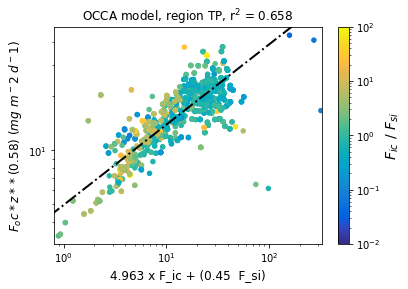

<Figure size 432x288 with 0 Axes>

In [257]:
logset = 0.01
ax = plt.gca()
plt.plot(x_line, y_line, color='black', ls='-.', lw=2)
g = ax.scatter(x, y, c=scale, cmap=parula_map, norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=100), s=20)
ax.set_yscale('log')
ax.set_xscale('log')
#plt.ylim(1e-2, 316.227766017)
#plt.xlim(0.00316227766, 600)
#axis([.005 500 .005 500])
plt.ylim(np.min(y)-0.1*np.min(y), np.max(y)+0.3*np.mean(y))
plt.xlim(np.min(x)-0.1*np.min(x), np.max(x)+0.3*np.mean(x))
cbar = plt.colorbar(g)

#use f strings 
#plt.title(r'$Southern \ Ocean \ (r^{2} = 0.89)$', size=16)
plt.title(f'OCCA model, region {region}, r$^2$ = {round(r2_median, 3)}')

plt.ylabel(f'$F_oc * z ** ( {round(b_median, 3)}) \ (mg \ m^{-2} \ d^{-1})$', size=12) 

plt.xlabel(f'{round(kappa_median, 3)} x F_ic + ({round(beta_median, 3)}  F_si)', size=12)

cbar.set_label(r'${F_{ic}} \ / \ {F_{si}}$', size=14)

plt.show()

plt.savefig(f'OCCA_{region}_scaling.jpg')